<a href="https://colab.research.google.com/github/ohhongseok/ML-DeepLearning/blob/main/2/2-1/Train_and_Test_set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 지도학습

1. 지도학습은 데이터와 정답이 있어야 한다.<br>
   - 데이터 : 학습에 사용되는 데이터
   - 정답 : 데이터에 대한 참 거짓 여부를 판단(라벨)
   - 데이터와 정답 두개를 합쳐 ***훈련데이터*** 라고 함
   - 데이터에 활용돠는 것들을 ***특성*** 이라고 함, ex -> 무게, 길이 등..

# 훈련세트와 테스트 세트

1. 왜 그럼 데이터를 나눠? 
    - 연습문제랑 실제 시험이 달라야 능력을 평가할 수 있듯이, 머린러닝 알고리즘의 성능을 제대로 평가하려면 ***훈련데이터*** 와 ***평가데이터***를 나누어 계산해야 한다. 
    - 훈련데이터(train set) : 실제 러닝에 사용되는 데이터
    - 테스트 데이터(test set) : 평가에 사용하는 데이터


In [5]:
# 실제 코드 구현부분

# 도미 데이터(길이와 무게)
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]
# 빙어 데이터 준비(길이와 무게)
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

# 두 데이터 함침(도미, 빙어 데이터)
total_length = bream_length+smelt_length
total_weight = bream_weight+smelt_weight

# scikit-learn 패키지 사용하려면 두개의 데이터를 2차원 리스트 만들어야 함
# 위의 total_length , total_weight 는 가로형 리스트 데이터

fish_data = [[l,w] for l,w in zip(total_length,total_weight)]
print(fish_data) #두 어종의 길이와 무게를 합친 2차원 리스트 생성

# 데이터 라벨링 위한 작업
fish_target = [1]*35+[0]*14
print(fish_target)

size = len(fish_target)

print("\n데이터 사이즈 : ",size)


[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

데이터 사이즈 :  49


In [13]:
# 이제 이 49개의 데이터에서 처음 35개를 훈련셋, 14개를 테스트셋으로 사용
# 파이썬 슬라이싱 활용
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

# 0~ 34 까지 총 35개 데이터
train_input = fish_data[:35]
train_target = fish_target[:35]
# 35 ~ 끝까지 총 14개 데이터 슬라이싱
test_input = fish_data[35:]
test_target = fish_target[35:]

# 훈련 데이터를 통해 데이터 테스트 진행 및 테스트 데이터를 활용해 모델의 정확도 평가
knn = knn.fit(train_input,train_target) 
knn.score(test_input,test_target)

0.0

**위에서 나온 데이터의 문제점**

 - 데이터(fish_data)를 앞에서부터 순서대로 잘랐다. 이런 데이터 형태는, 빙어와 도미 데이터가 잘 섞이지 않고, 34개의 도미 데이터, 14개의 빙어 데이터로만 나뉘기 때문에 모델의 정확도가 제대로 평가되지 않는다.
 - 따라서 모델이 한쪽으로 편향되어 있으며, 이러한 상황을 ***샘플링 편향*** 이라고 한다.
 - 결과적으로 데이터셋을 구성 할 때 두 데이터가 골고루 섞일 수 있도록(편향을 최소화) 해야한다.
 - 이 책에서는 numpy 배열을 활용하여 진행

In [15]:
# 데이터를 섞기 전 리스트를 2차원 배열형태로 바꿔야 함
import numpy as np

# 이를 활용하여 리스트를 넘파이 배열로 만들어야 한다.
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

print(input_arr)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [17]:
print(input_arr.shape)
# 이 출력을 통해,(총 데이터의 갯수, 총 특성의 갯수(무게, 길이 등..)를 알 수 있다.)

(49, 2)


 - 위에서 만든 Numpy 배열을 활용하여 랜덤하게 데이터를 뽑아내 트레이닝 데이터, 훈련데이터로 나누어 활용할 수 있다.
 - 주의할점은 위에서 만든 input_arr , target_arr의 ***같은 위치***는 같이 선택되어야 한다. 다른 데이터가 선택되면 올바르게 훈련이 안 된다.



In [18]:
np.random.seed(42)
index = np.arange(49)
np.random.shuffle(index)
# 랜덤하게 생성된 index 값을 활용하여 train, test set을 만들 것!
print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [21]:
# 위에서 생성한 랜덤한 인덱스를 활용하여 train input과 target 을 0~34까지 총 35개 선택!
# 따라서 input_arr에는 위에 넘파이 랜덤배열에서 생성한 랜덤한 인덱스값의 데이터들이 선택된다.
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]
# 나머지 14개의 데이터를 활용해 test 데이터셋을 만듦
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

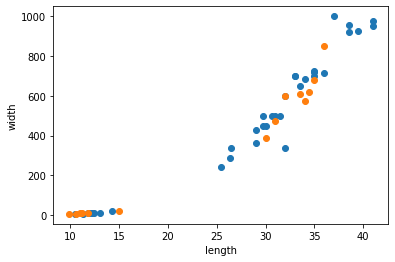

In [23]:
# 데이터가 제대로 잘 섞였는지 확인해보기(scatter 분포 그래프로)
import matplotlib.pyplot as plt
# 파란 데이터가 훈련셋, 주황색이 테스트 셋 데이터
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(test_input[:,0],test_input[:,1])
plt.xlabel('length')
plt.ylabel('width')
# 데이터가 제대로 섞인것을 확인
plt.show()

In [28]:
knn=knn.fit(train_input,train_target)
# 섞인 모델에 대해서 예측 점수를 봤을때 100%의 정확성 보임
knn.score(test_input,test_target)

1.0

In [30]:
# test input(물고기 특성 데이터)을 통해 확인해 보았을 때 제대로 예측했는지
knn.predict(test_input)

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [32]:
print("\n실제 test_target(0과 1로 이루어진 target data들)과 비교\n",test_target)
# 위의 predict로 봤을때 제대로 예측한것을 알 수 있다.


실제 test_target(0과 1로 이루어진 target data들)과 비교
 [0 0 1 0 1 1 1 0 1 1 0 1 1 0]


# 마무리 키워드 정리

## 학습 및 데이터의 종류
1. 지도학습 : 입력과 타겟 데이터를 활용해 입력 시 타겟데이터와의 일치를 통해 데이터를 예측하는 학습,
2. 비지도 학습 : 타겟데이터가 없이 입력데이터 내에서 특징을 찾아서 예측을 함

3. 훈련 데이터 : 모델의 훈련(.fit())을 할 때 사용되는 데이터

4. 테스트 데이터 : 전체 데이터에서 떼어낸 데이터로, 모델을 평가할 때 사용된다.